<a href="https://colab.research.google.com/github/ricardoandresnietogomez/ensayo/blob/circleci-project-setup/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas
import matplotlib
from matplotlib import pyplot

data=pandas.read_csv("/content/Titanic.csv", index_col="PassengerId")#cargo toda la data
#data.tail() para ver los utimos valores de la tabla
data=pandas.read_csv("/content/Titanic.csv", index_col="PassengerId",usecols=["PassengerId","Survived","Pclass","Name","Sex","Age","Fare"])
data.columns=["sobrevivo","clase","Nombre","sexo","edad","tarifa"]# con este comando cambio los datos de los encabezados
data.head()
#data.shape para saber cuantas filas y columnas tiene la data
#some= {"Survived":1,"Pclass":1,"Name":"Ricardo Andres Nieto"}# si quiero ingresar datos a la tabla
#data=data.append(some, ignore_index=True)para ingresar los datos de la linea anterios
#data.tail() para ver los utimos valores de la tabla

,sobrevivo,clase,Nombre,sexo,edad,tarifa
PassengerId,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500


1. Cuantos valores se tiene para cada columna, valores medios, mediana y cuartiles



In [ ]:
data.describe()

,sobrevivo,clase,edad,tarifa
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


imputar datos ya que al hacer la cuenta de las edades se puede ver que son 714 personas con edad el resto no tiene valor 

In [ ]:
data["edad"].fillna(0)

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     0.0
890    26.0
891    32.0
Name: edad, Length: 891, dtype: float64

nos devolvio otra columna independiente, entonces hay que hacer asignacion para que la reemplace

In [ ]:
mean_age=data["edad"].mean()
data["edad"]=data["edad"].fillna(mean_age)
data.describe()

,sobrevivo,clase,edad,tarifa
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,13.002015,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,29.699118,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


2.cuantos hombres y mujeres hay en el dataset? se debe hacer una agrupacion de la columna con value_counts() y se dibuja en barras

In [2]:
data["sexo","clase"].value_counts().plot.bar()# cuenta cuentas mujeres y hombres hay
pyplot.ylabel("frecuency")
pyplot.grid()
pyplot.show()

KeyError: ignored

3. extraer valores medios agrupados por sexo

In [ ]:
data.groupby("sexo").mean()#la media de edades de mujeres y hombres


,sobrevivo,clase,edad,tarifa
sexo,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


traer dos columnas

In [ ]:
data[["tarifa","sexo"]]

,tarifa,sexo
PassengerId,,
1,7.2500,male
2,71.2833,female
3,7.9250,female
4,53.1000,female
5,8.0500,male
...,...,...
887,13.0000,male
888,30.0000,female
889,23.4500,female


4.distribucion de las clases?

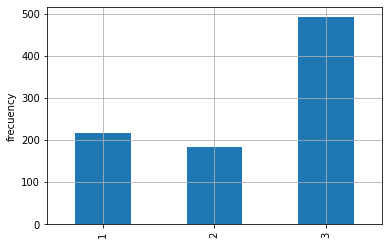

In [ ]:
data["clase"].value_counts().sort_index().plot.bar()#sort_index de menor a mayor si lo quiere sortear por valores es sort_values
pyplot.ylabel("frecuency")
pyplot.grid()
pyplot.show()

5. Cuanto fue lo que se pago mas y lo que se pago menos por un ticket

In [ ]:
max_fare=data["tarifa"].max()
min_fare=data["tarifa"].min()
print(min_fare,"    ",max_fare)

0.0      512.3292


6. quien era la persona con mas edad

In [ ]:
pasajero_mas_viejo=data["edad"].sort_values(ascending=False).index[0]#nos da la posicion del pasajero mas viejo
pasajero_mas_viejo
data.loc[pasajero_mas_viejo]#muestra los datos de ese id que 631 en este caso

sobrevivo                                       1
clase                                           1
Nombre       Barkworth, Mr. Algernon Henry Wilson
sexo                                         male
edad                                           80
tarifa                                         30
Name: 631, dtype: object

7. cual fue la persona que mas pago por el ticket

In [ ]:
pasajero_mas_pago=data["tarifa"].sort_values(ascending=False).index[0]#nos da la posicion del pasajero mas viejo
pasajero_mas_pago
data.loc[pasajero_mas_pago]#muestra los datos de ese id que 631 en este caso

sobrevivo                                     1
clase                                         1
Nombre       Cardeza, Mr. Thomas Drake Martinez
sexo                                       male
edad                                         36
tarifa                                  512.329
Name: 680, dtype: object

8. como estaba distribuida por sexo y clase

sexo   female  male
clase              
1          94   122
2          76   108
3         144   347


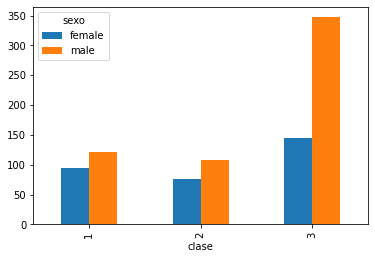

In [ ]:
data["ones"]=1

data.groupby(["clase","sexo"])["ones"].count().unstack().plot.bar()# lo que se hace con la agregacion de la columna 1 es contar todos esos unos y agruparlos en sexo y clase
#unstack es para agrupar
a=data.groupby(["clase","sexo"])["ones"].count().unstack()#tabla pivote
print(a)

clase     1    2    3
sexo                 
female   94   76  144
male    122  108  347


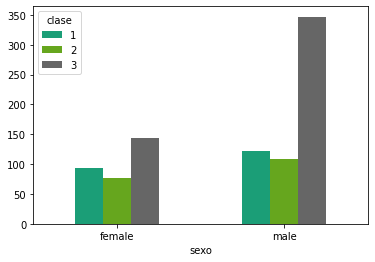

In [ ]:
data["ones"]=1 # este ejemplo es con las barras invertidas

data.groupby(["sexo","clase"])["ones"].count().unstack().plot.bar(rot=0,colormap="Dark2")# lo que se hace con la agregacion de la columna 1 es contar todos esos unos y agruparlos en sexo y clase
#unstack es para agrupar #rot=0 es para no rotar los textos
a=data.groupby(["sexo","clase"])["ones"].count().unstack()#tabla pivote
print(a)

9 como estaban distribuidos los que sobrevivieron por clase

clase        1   2    3
sobrevivo              
0           80  97  372
1          136  87  119


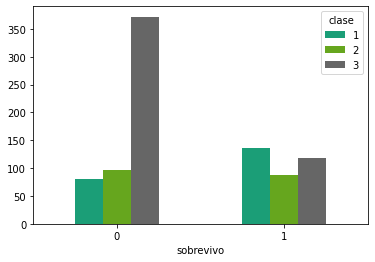

In [ ]:
data["ones"]=1 # este ejemplo es con las barras invertidas

data.groupby(["sobrevivo","clase"])["ones"].count().unstack().plot.bar(rot=0,colormap="Dark2")# lo que se hace con la agregacion de la columna 1 es contar todos esos unos y agruparlos en sexo y clase
#unstack es para agrupar #rot=0 es para no rotar los textos
a=data.groupby(["sobrevivo","clase"])["ones"].count().unstack()#tabla pivote
print(a)

sobrevivo    0    1
clase              
1           80  136
2           97   87
3          372  119


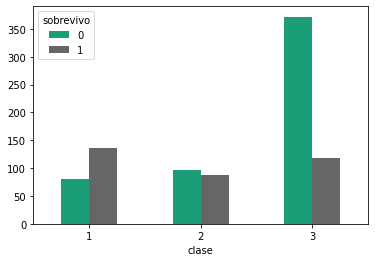

In [ ]:
data["ones"]=1 # este ejemplo es con las barras invertidas

data.groupby(["clase","sobrevivo"])["ones"].count().unstack().plot.bar(rot=0,colormap="Dark2")# lo que se hace con la agregacion de la columna 1 es contar todos esos unos y agruparlos en sexo y clase
#unstack es para agrupar #rot=0 es para no rotar los textos
a=data.groupby(["clase","sobrevivo"])["ones"].count().unstack()#tabla pivote
print(a)

10. como estaban distribuidos los que sobrevivieron por sexo

sexo       female  male
sobrevivo              
0              81   468
1             233   109


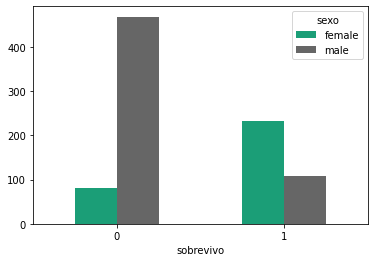

In [ ]:
data["ones"]=1 # este ejemplo es con las barras invertidas

data.groupby(["sobrevivo","sexo"])["ones"].count().unstack().plot.bar(rot=0,colormap="Dark2")# lo que se hace con la agregacion de la columna 1 es contar todos esos unos y agruparlos en sexo y clase
#unstack es para agrupar #rot=0 es para no rotar los textos
a=data.groupby(["sobrevivo","sexo"])["ones"].count().unstack()#tabla pivote
print(a)

sobrevivo    0    1
sexo               
female      81  233
male       468  109


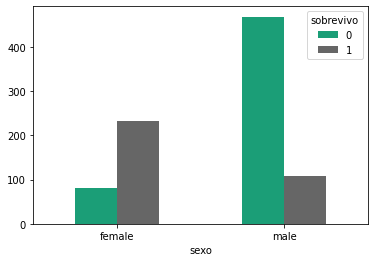

In [ ]:
data["ones"]=1 # este ejemplo es con las barras invertidas

data.groupby(["sexo","sobrevivo"])["ones"].count().unstack().plot.bar(rot=0,colormap="Dark2")# lo que se hace con la agregacion de la columna 1 es contar todos esos unos y agruparlos en sexo y clase
#unstack es para agrupar #rot=0 es para no rotar los textos
a=data.groupby(["sexo","sobrevivo"])["ones"].count().unstack()#tabla pivote
print(a)

11. histograma de tarifas

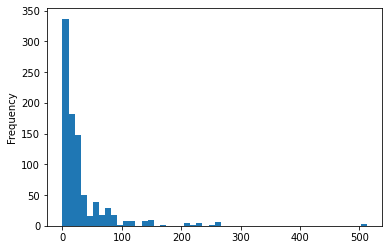

In [ ]:
data["tarifa"].plot.hist(bins=50)# el bisn es para poner mas barras y verlo mas distribuido
pyplot.show()

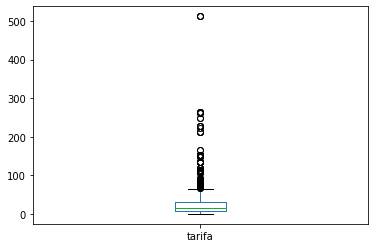

In [ ]:
data["tarifa"].plot.box()#grafica de bigotes
pyplot.show()

12. histograma de edades

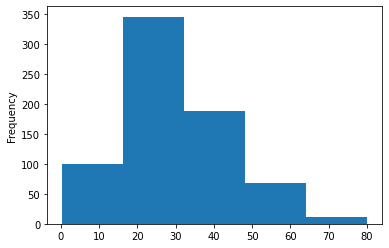

In [ ]:
data["edad"].plot.hist(bins=5)# el bisn es para poner mas barras y verlo mas distribuido
pyplot.show()

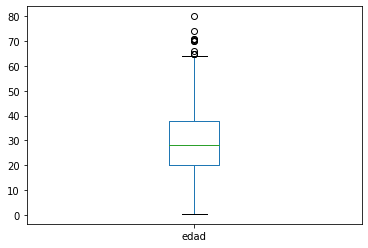

In [ ]:
data["edad"].plot.box()#grafica de bigotes muestra los valores medios, los cuartiles, minimo y maximo y datos raros salidos del contexto
pyplot.show()

In [ ]:
13. cuanntas personas por genero sobrevivieron mayores 50 de  años?

In [27]:
data[(data["edad"]>50) & (data["sobrevivo"]==1)]["sexo"].value_counts()

female    16
male       6
Name: sexo, dtype: int64

In [29]:
((data["edad"]>50) & (data["sobrevivo"]==1)).sum()#se llama sumar dos mascaras o dos condiciones 

22

14. si yo hubiea sido hombre cual es la probabilidad de haber sido hombre



In [36]:
contar_hombres=(data["sexo"]=="male").sum()
(contar_hombres/len(data))*100


64.75869809203144

si yo hubiera sido un hombre en el titanic, cual era la probabilidad de sobrevivir 

In [130]:
subdata=data[data["sexo"]=="male"]
hombres_sobreviven=(subdata["sobrevivo"]==1).sum()
hombres_sobreviven/len(subdata)*100

18.890814558058924

512.3292
631


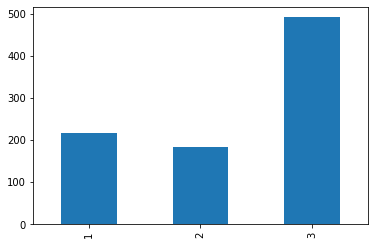

In [193]:
data
data["sobrevivo"]# saca la matrix de todos los que estan en la columna sobrevivo
data["sobrevivo"].count()# cuanta todos los datos de la columna sobrevivo
(data["sobrevivo"]==1).sum()#suma los datos de los sobrevivientes
(data["sobrevivo"]==0).sum()#cuanta los datos de los que murieron
data["edad"].mean()#nos devuelve la mediana de la edad
data.groupby("sexo").mean()#nos devuelve los sexos con diferentes caracteristicas
data[["tarifa","sexo"]]#nos devuelve dos columnas
data["clase"].value_counts().sort_index().plot.bar()#cuantas las clases sort es para ir de menor a mayor en la clase
max_fare=data["tarifa"].max()#saca el mayor valor pagado por la tarifa
print(max_fare)
pasajero_mas_viejo=data["edad"].sort_values(ascending=False).index[0]#nos da la posicion del pasajero mas viejo
print(pasajero_mas_viejo)